# Data Analysis and Clustering with KMeans

## Importing Libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

## Load Dataset

In [73]:
# Specify the path to your insurance_claims_raw file
df = pd.read_excel('C:/Users/Nekhavg/Desktop/Advanced_Features_Claims_df.xlsx')
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... Summer Claims total_premiums_paid net_value_of_customer  \
0       466132  ...           NaN        38455.540000         -33154.460000   
1       468176  ...           NaN        22747.180000          17677.180000   
2       430632  ...           NaN        15780.063333         -18869.936667   
3       608117  ...           NaN        30202.453333         -33197.546667   
4       610706  ...           NaN        30094.290000          23594.290000   

  season_encoded Season_Claim_Interaction  insured_education_level_encoded  \
0              1                    71610                                4   
1              1                     5070                                4   
2              1                    34650                                6   
3              1                    63400                                6   
4              1                     6500                                0   

   insured_occupation_encoded Education_Premium_Interaction  \
0                           2                       5627.64   
1                           6                       4788.88   
2                          11                       8478.84   
3                           1                       8494.44   
4                          11                          0.00   

  Occupation_Claim_Interaction Age_Vehicles_Interaction  
0                       143220                       48  
1                        30420                       42  
2                       381150                       87  
3                        63400                       41  
4                        71500                       44  

[5 rows x 65 columns]

In [74]:

# Verify the dfFrame columns
print(df.columns)


Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'customer_id',
       'age_category', 'policy_deductable_category',
       'policy_annual_premium_category', 'capital_gains_category',
       'total_claim_amount_category', 'incid

## Exploratory df Analysis (EDA)

In [75]:

# 1. Summarize the df
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 65 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   months_as_customer               1000 non-null   int64         
 1   age                              1000 non-null   int64         
 2   policy_number                    1000 non-null   int64         
 3   policy_bind_date                 1000 non-null   datetime64[ns]
 4   policy_state                     1000 non-null   object        
 5   policy_csl                       1000 non-null   object        
 6   policy_deductable                1000 non-null   int64         
 7   policy_annual_premium            1000 non-null   float64       
 8   umbrella_limit                   1000 non-null   int64         
 9   insured_zip                      1000 non-null   int64         
 10  insured_sex                      1000 non-null   object      

## 2. Visualize Distributions

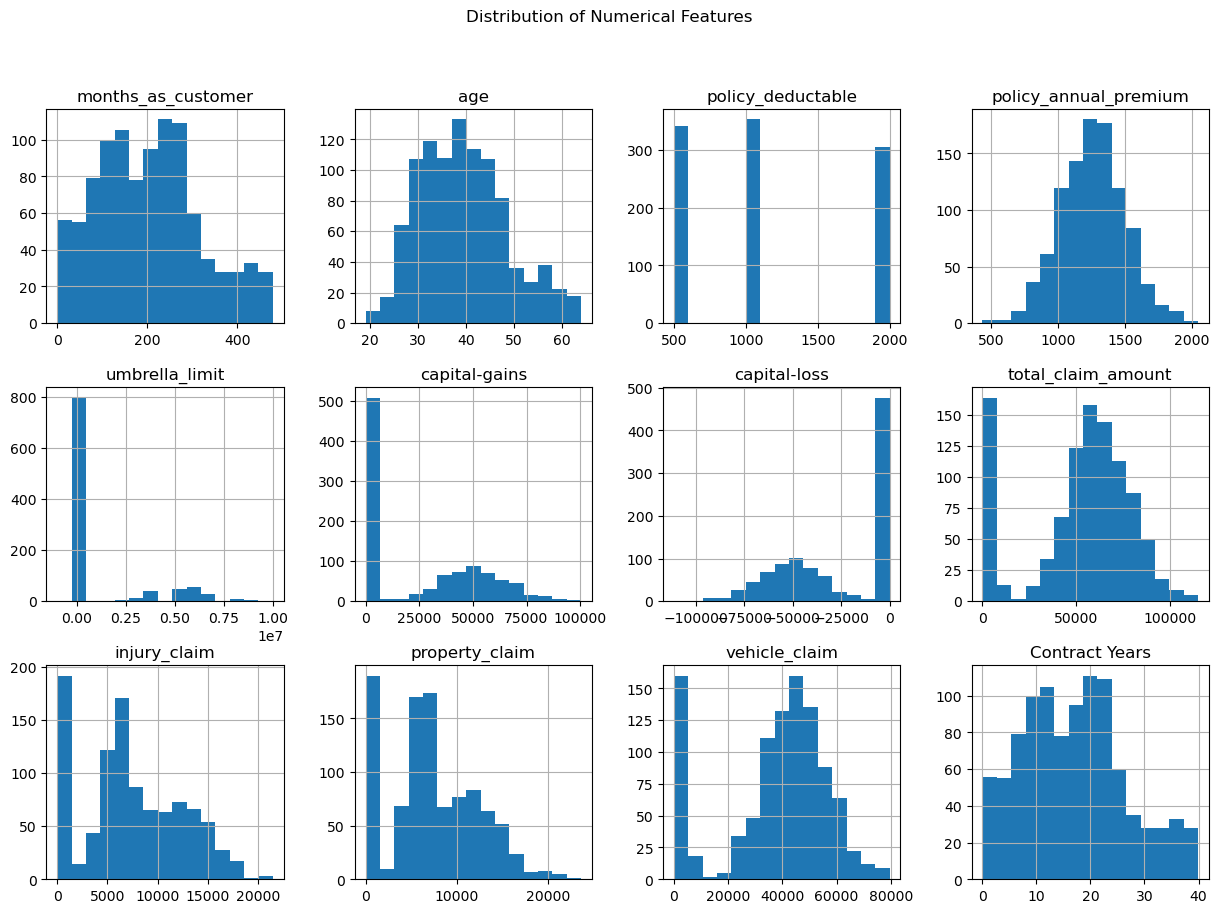

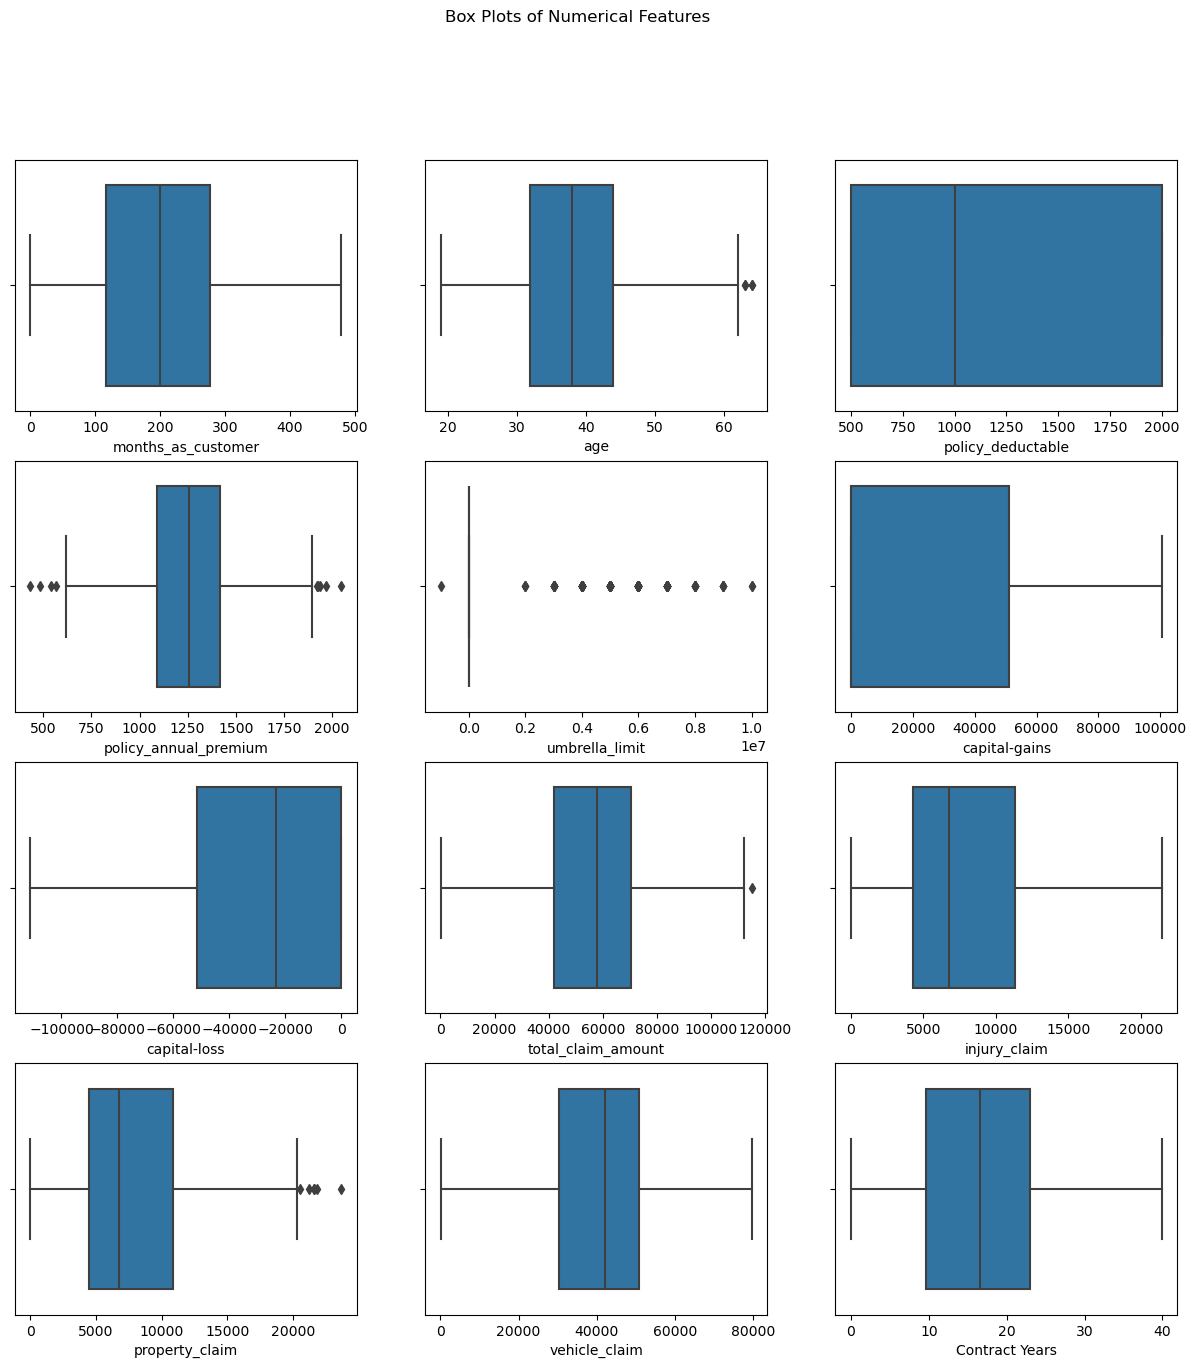

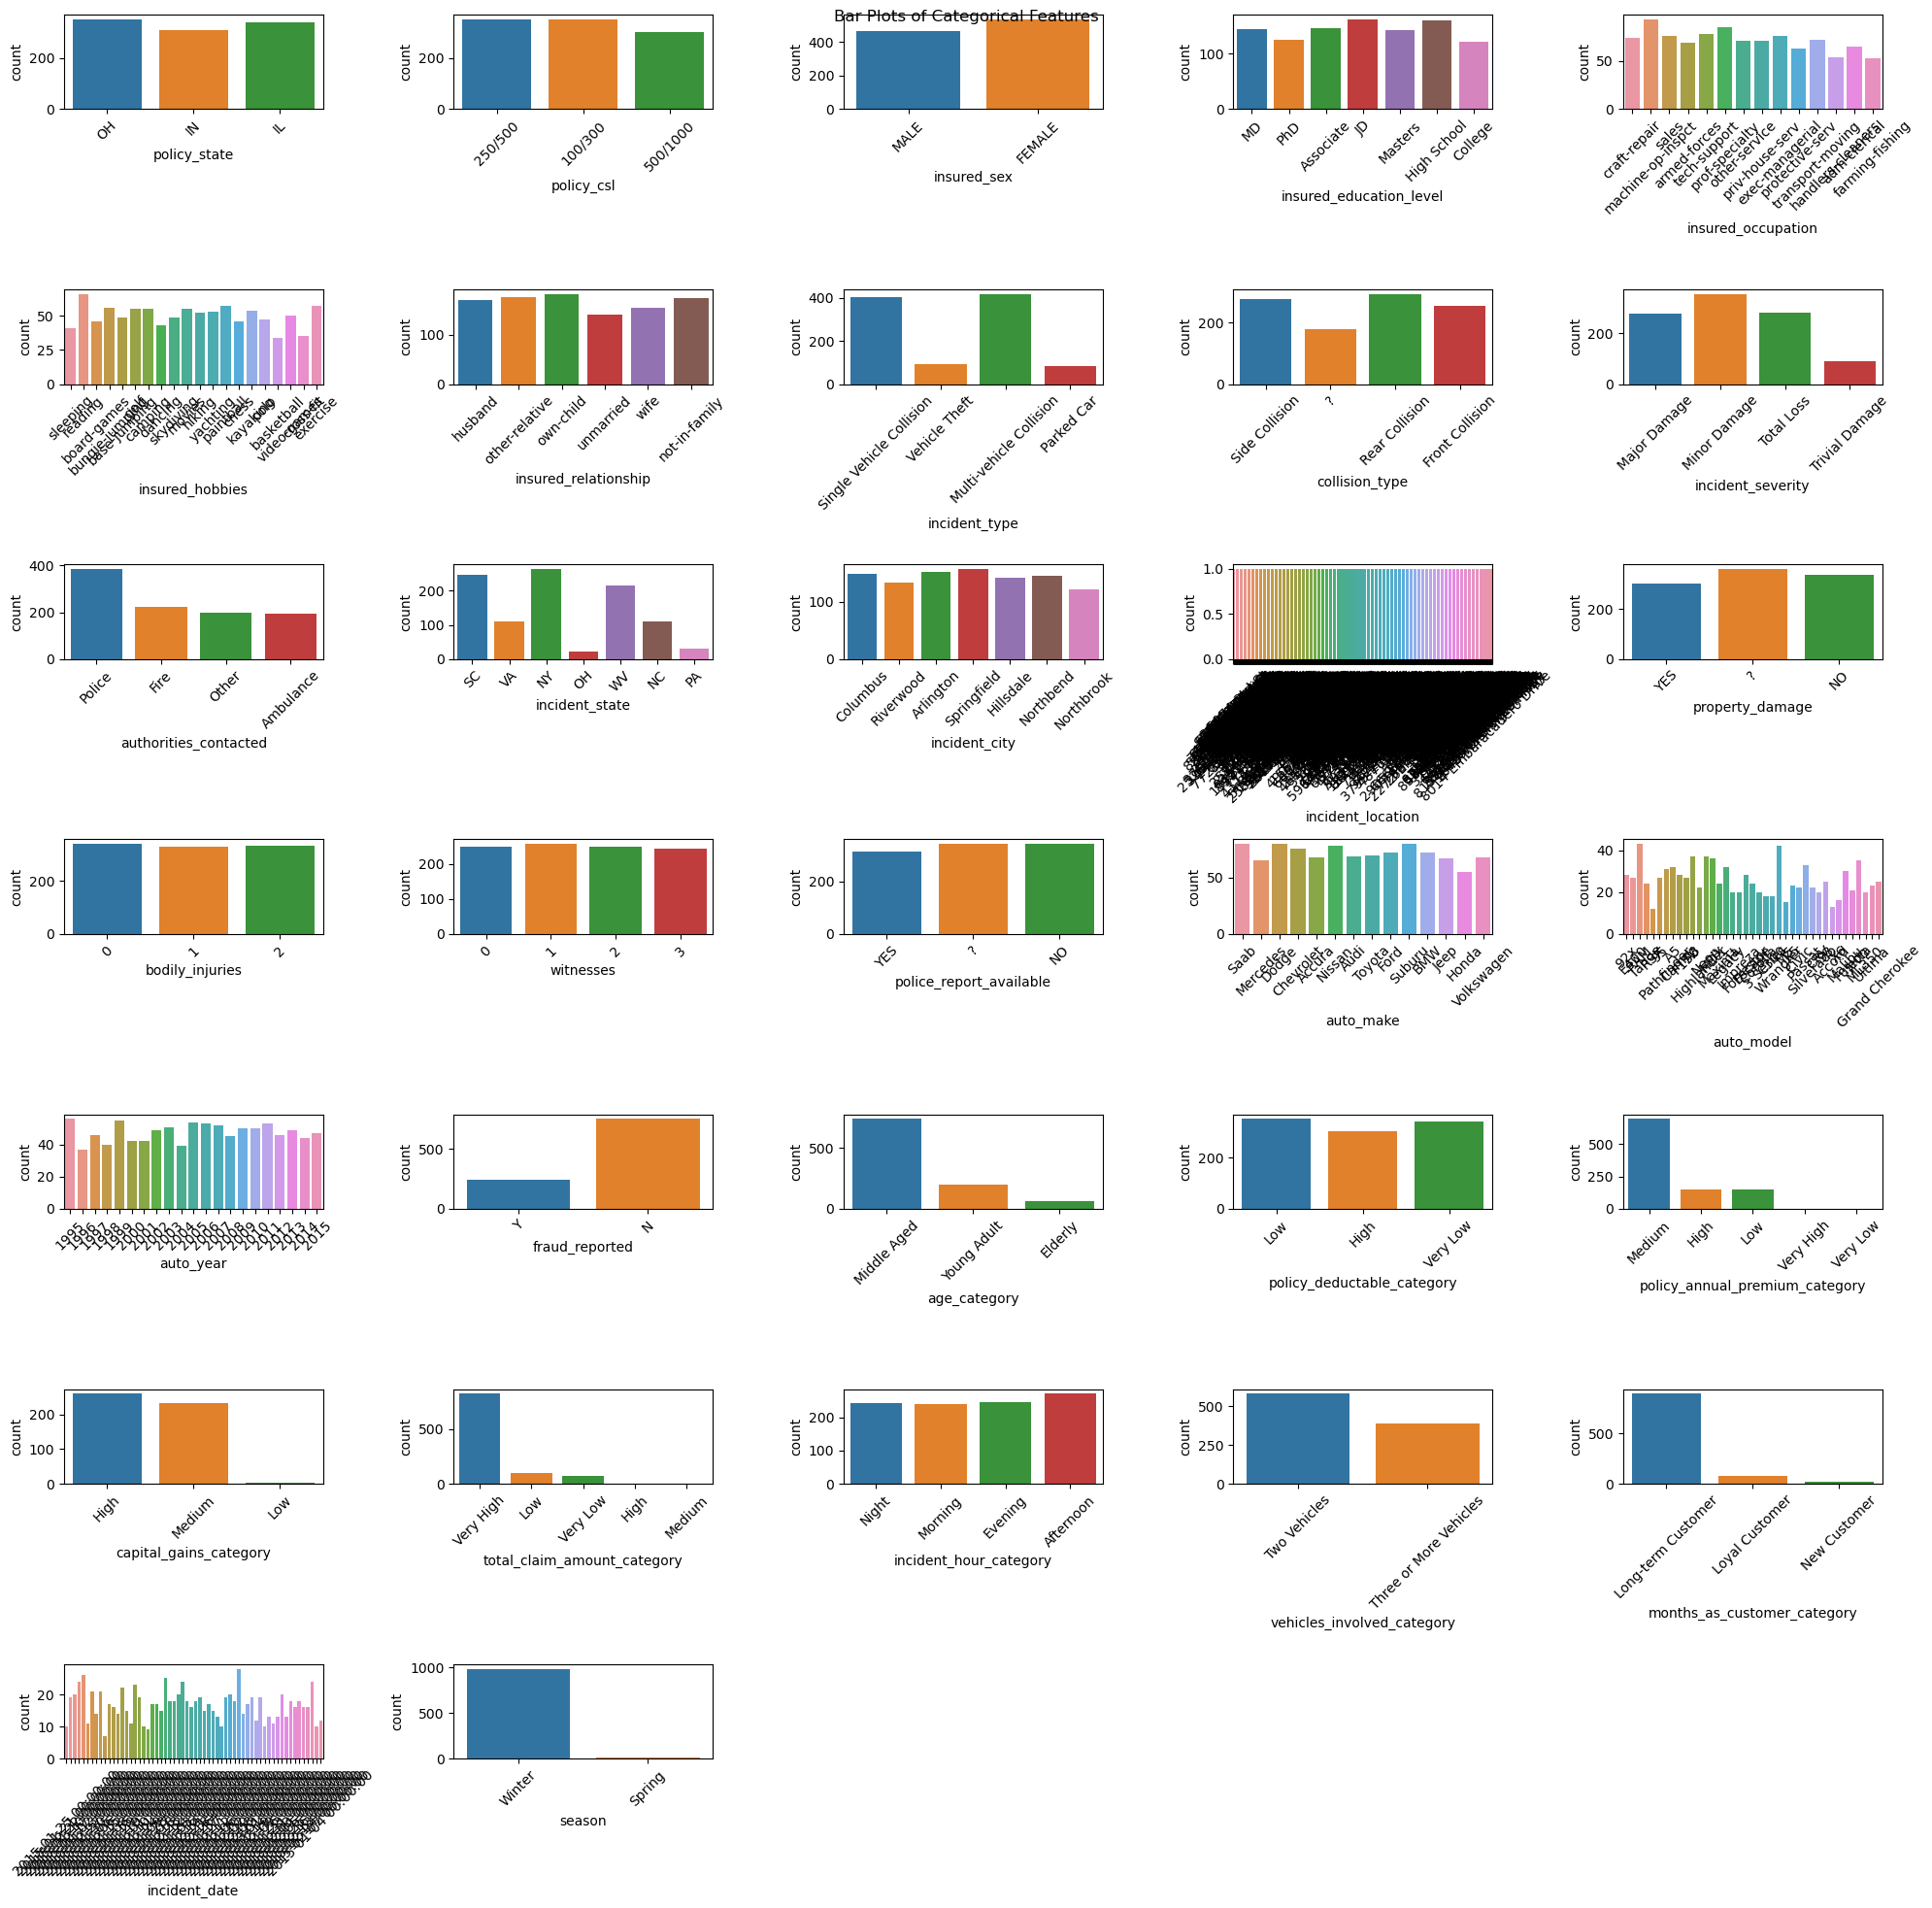

In [76]:

# Histograms for numerical features
numerical_features = ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 
                      'capital-gains', 'capital-loss', 'total_claim_amount', 'injury_claim', 'property_claim', 
                      'vehicle_claim', 'Contract Years']
df[numerical_features].hist(bins=15, figsize=(15, 10), layout=(3, 4))
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Box plots for numerical features
plt.figure(figsize=(15, 15))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df[feature])
plt.suptitle('Box Plots of Numerical Features')
plt.show()

# Bar plots for categorical features
categorical_features = ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 
                        'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 
                        'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 
                        'incident_location', 'property_damage', 'bodily_injuries', 'witnesses', 
                        'police_report_available', 'auto_make', 'auto_model', 'auto_year', 'fraud_reported', 
                        'age_category', 'policy_deductable_category', 'policy_annual_premium_category', 
                        'capital_gains_category', 'total_claim_amount_category', 'incident_hour_category', 
                        'vehicles_involved_category', 'months_as_customer_category', 'incident_date', 'season']
plt.figure(figsize=(20, 20))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(7, 5, i)
    sns.countplot(x=df[feature])
    plt.xticks(rotation=45)
plt.suptitle('Bar Plots of Categorical Features')
plt.tight_layout()
plt.show()


## 3. Explore Relationships

months_as_customer       0
age                      0
policy_deductable        0
policy_annual_premium    0
umbrella_limit           0
capital-gains            0
capital-loss             0
total_claim_amount       0
injury_claim             0
property_claim           0
vehicle_claim            0
Contract Years           0
dtype: int64


C:\Users\Nekhavg\AppData\Local\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nekhavg\AppData\Local\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nekhavg\AppData\Local\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nekhavg\AppData\Local\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

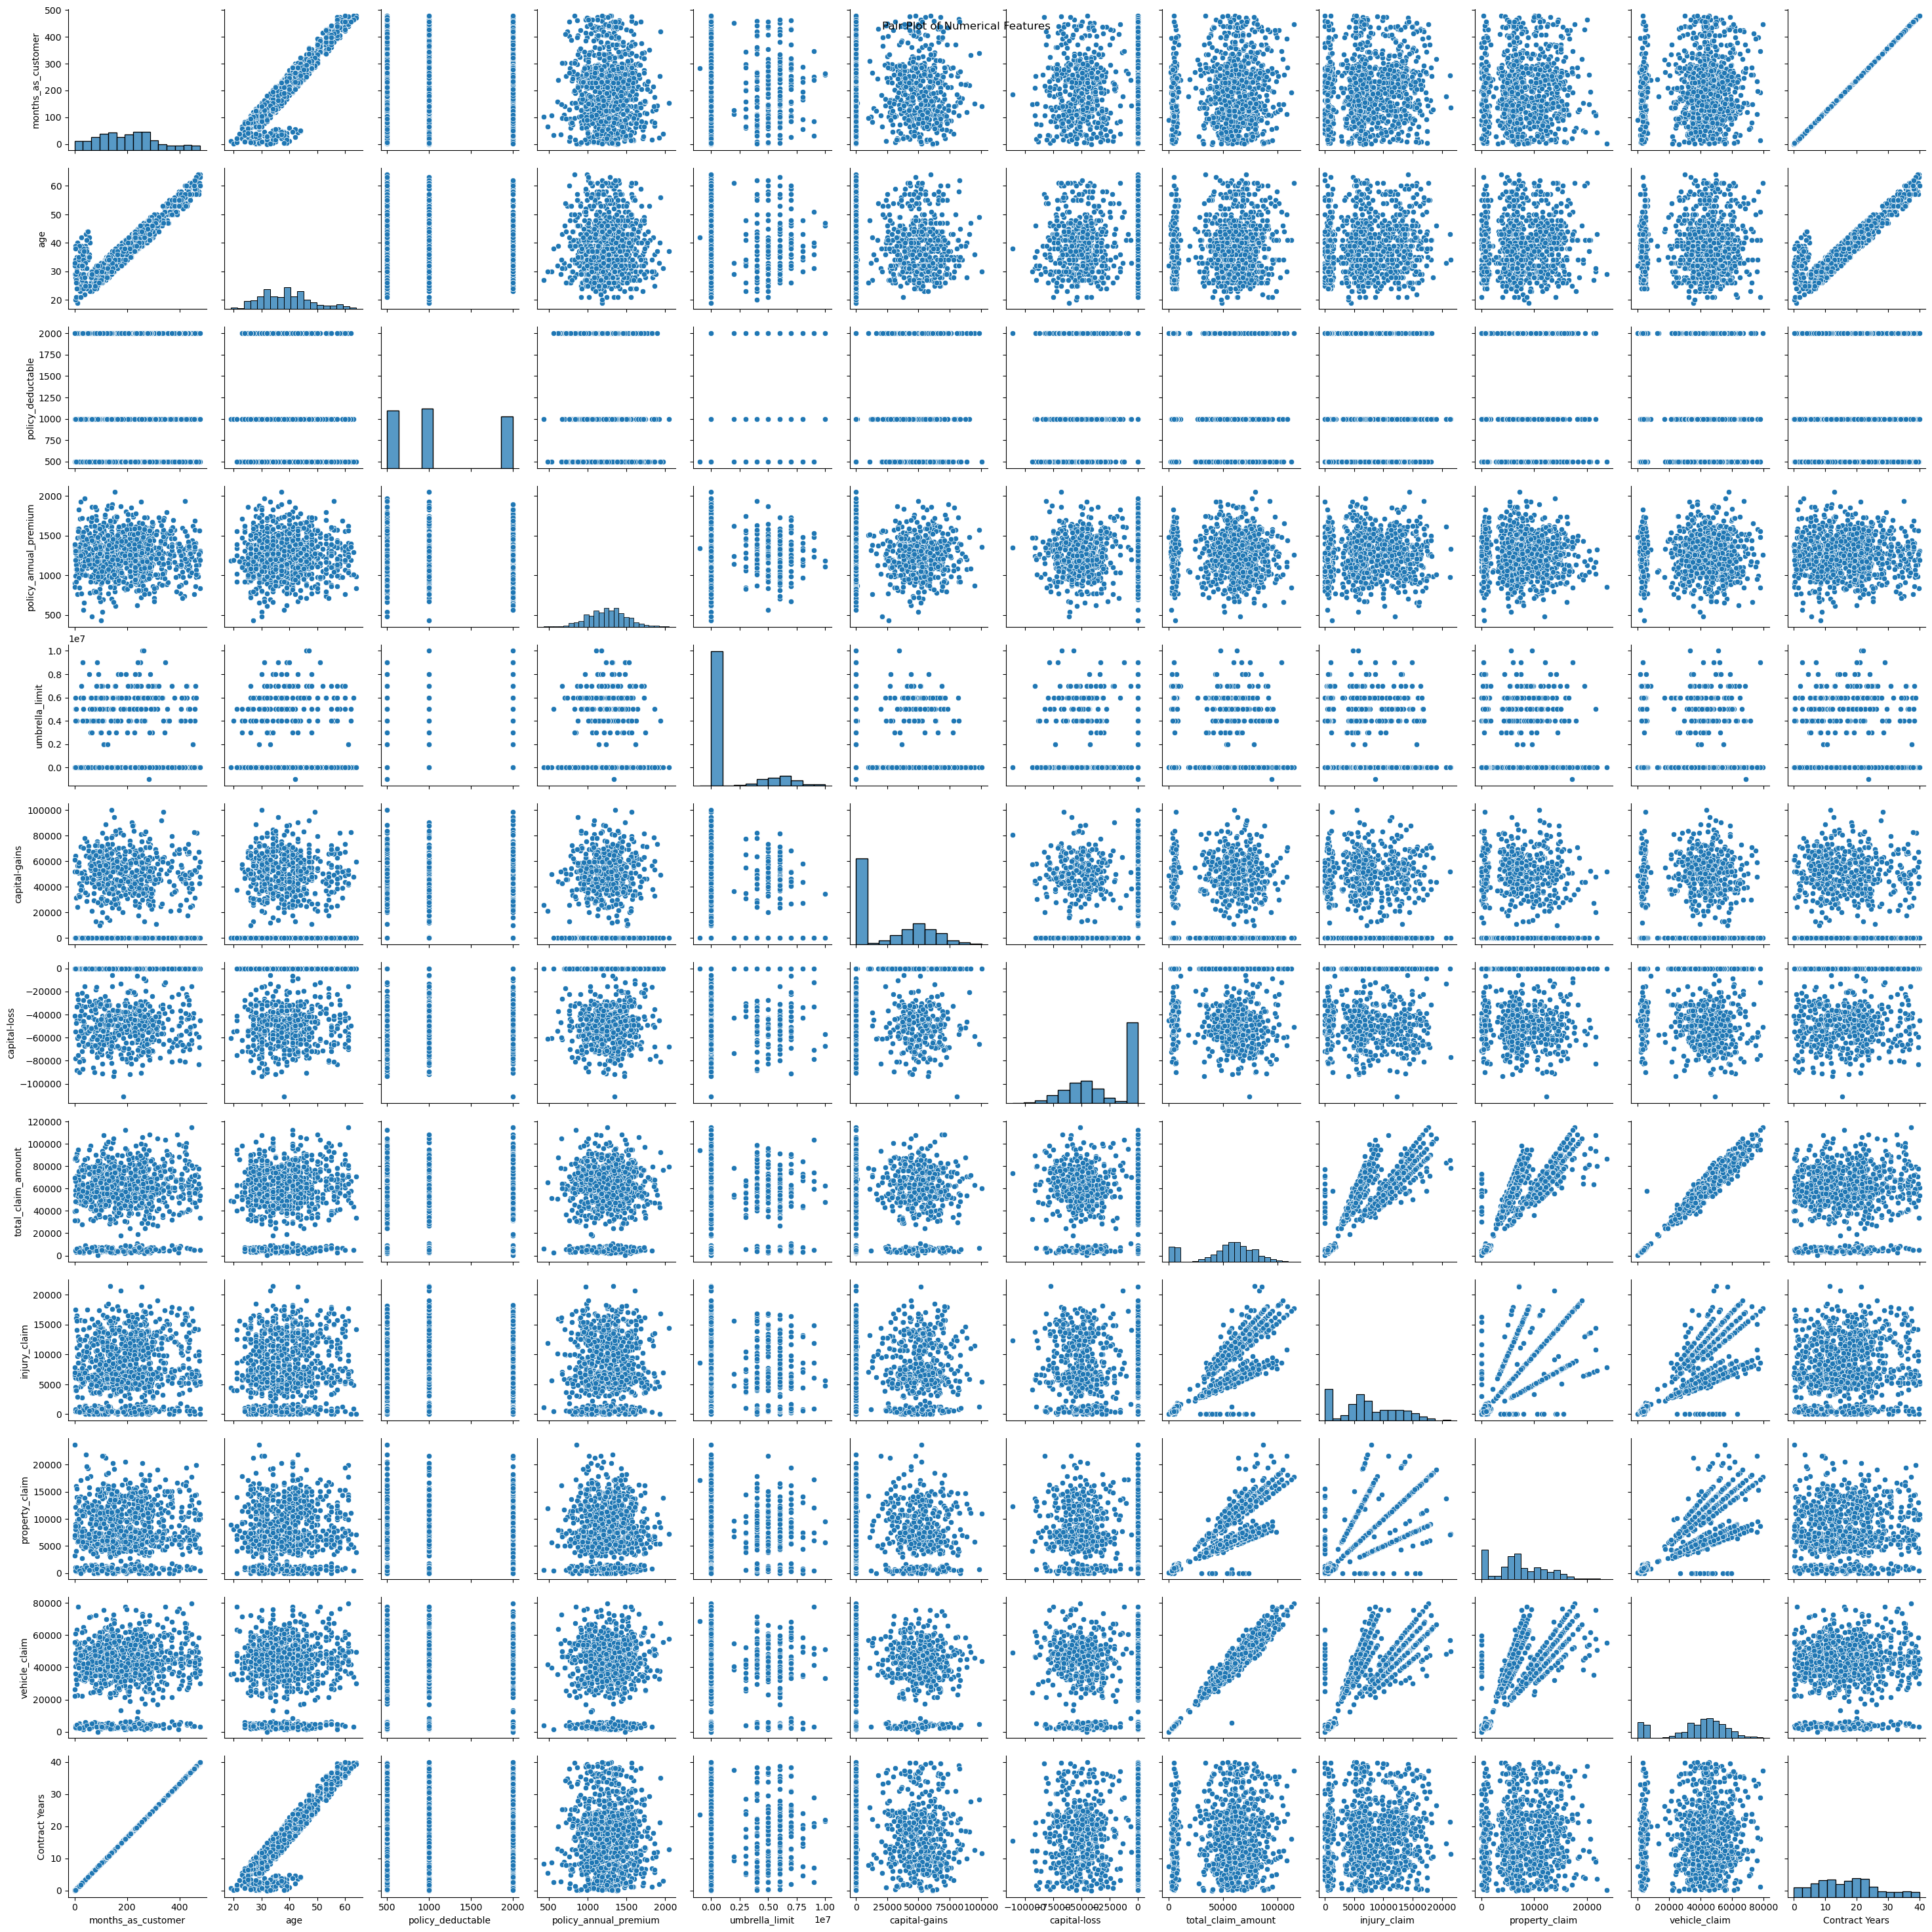

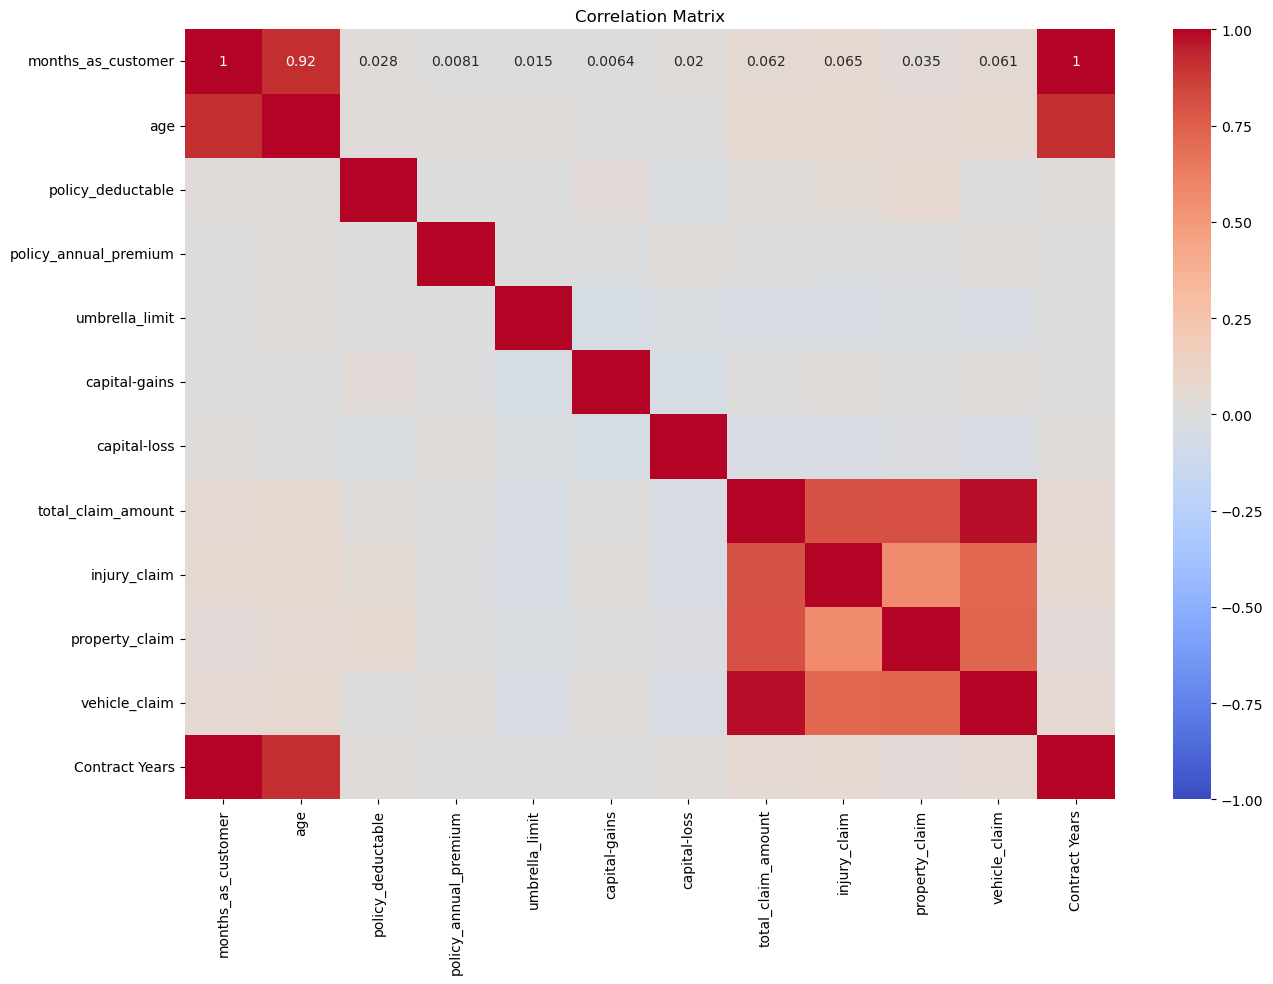

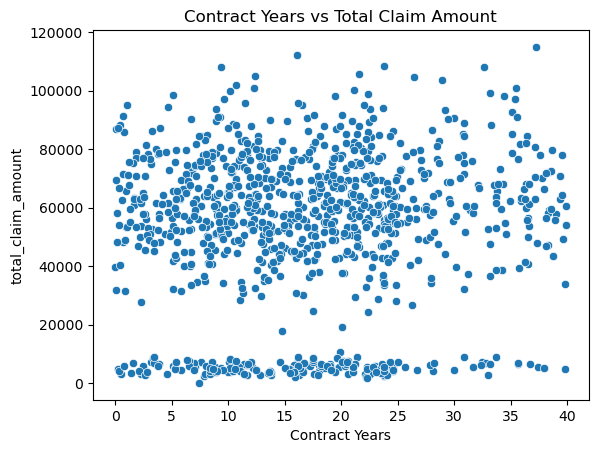

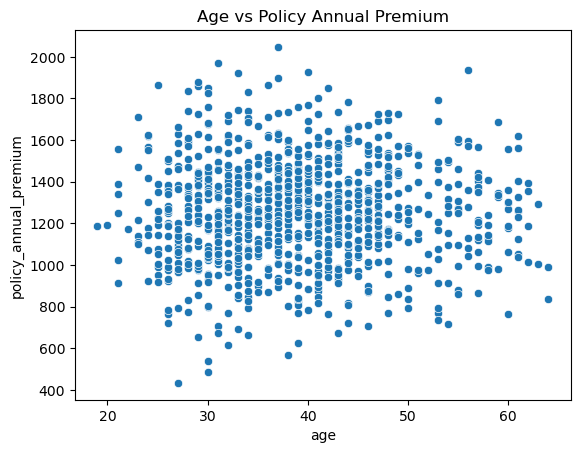

In [77]:

# Replace infinite values with NaN
df.replace([float('inf'), -float('inf')], float('nan'), inplace=True)

# Drop rows with NaN values in numerical features
df.dropna(subset=numerical_features, inplace=True)

# Verify if there are any NaN values left
print(df[numerical_features].isnull().sum())  # Check for NaN values in numerical features
# Pair plot
sns.pairplot(df[numerical_features])
plt.suptitle('Pair Plot of Numerical Features')
plt.show()

# Correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Scatter plots for specific relationships
sns.scatterplot(x='Contract Years', y='total_claim_amount', df=df)
plt.title('Contract Years vs Total Claim Amount')
plt.show()

sns.scatterplot(x='age', y='policy_annual_premium', df=df)
plt.title('Age vs Policy Annual Premium')
plt.show()


## Advanced Analysis

### Feature Engineering

C:\Users\Nekhavg\AppData\Local\anaconda\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


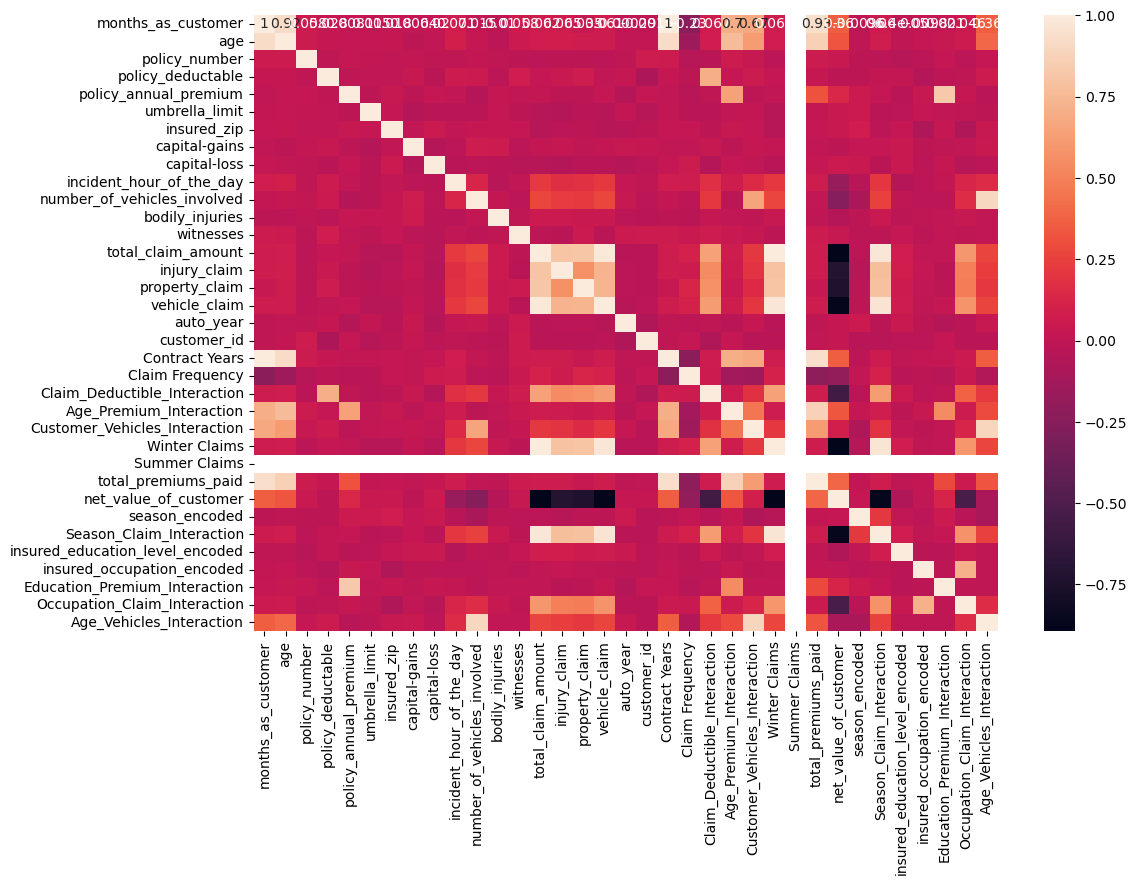

CV RMSE: 4740.348648235626
Test RMSE: 4933.006373250093


In [85]:

# df Preprocessing
# Handling missing values using ffill() directly
df.ffill(inplace=True)

# Ensure correct df types
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])

# Normalization
scaler = StandardScaler()
numerical_features = ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Correlation matrix
# Selecting only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

# Feature Engineering
# Interaction Features
df['Season_Claim_Interaction'] = df['season_encoded'] * df['total_claim_amount']
df['Education_Premium_Interaction'] = df['insured_education_level_encoded'] * df['policy_annual_premium']
df['Occupation_Claim_Interaction'] = df['insured_occupation_encoded'] * df['total_claim_amount']
#df['Age_Vehicles_Interaction'] = df['age'] * df['number_of_vehicles']

# Model Building
X = df.drop(['net_value_of_customer', 'policy_number'], axis=1)
y = df['net_value_of_customer']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline for preprocessing and model training
numeric_features = ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'Season_Claim_Interaction', 'Education_Premium_Interaction', 'Occupation_Claim_Interaction', 'Age_Vehicles_Interaction']
categorical_features = ['policy_state', 'policy_csl']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Choose model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can tune n_estimators and other hyperparameters

# Create pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)
print(f'CV RMSE: {cv_rmse.mean()}')

# Fit the model
pipeline.fit(X_train, y_train)

# Predictions and evaluation
y_pred = pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Test RMSE: {rmse}')


## Hyperparameter Tuning with GridSearchCV in Scikit-Learn

In [87]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [10, 20, 30],
    'model__min_samples_split': [2, 5, 10]
}

# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', RandomForestRegressor(random_state=42))])

# GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters and RMSE
best_params = grid_search.best_params_
best_rmse = np.sqrt(-grid_search.best_score_)

print(f'Best Parameters: {best_params}')
print(f'Best CV RMSE: {best_rmse}')


Best Parameters: {'model__max_depth': 20, 'model__min_samples_split': 2, 'model__n_estimators': 200}
Best CV RMSE: 4713.0293183776785
